In [68]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [69]:
df = pd.read_csv(r"/Users/yourgrandpaprogenynamesmcky/Developer/BIG_DATA_AI/Hw5/HW3_movie_metadata-661316-17373502460835.csv")

In [70]:
df.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


#### Explore Data

In [71]:
df.shape

(5043, 27)

In [72]:
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
num_critic_for_reviews,4993.0,140.2,121.6,1.0,50.0,110.0,195.0,8.130000e+02
duration,5028.0,107.2,25.2,7.0,93.0,103.0,118.0,5.110000e+02
director_facebook_likes,4939.0,686.5,2813.3,0.0,7.0,49.0,194.5,2.300000e+04
actor_3_facebook_likes,5020.0,645.0,1665.0,0.0,133.0,371.5,636.0,2.300000e+04
actor_1_facebook_likes,5036.0,6560.0,15020.8,0.0,614.0,988.0,11000.0,6.400000e+05
gross,4159.0,48468407.5,68452990.4,162.0,5340987.5,25517500.0,62309437.5,7.605058e+08
num_voted_users,5043.0,83668.2,138485.3,5.0,8593.5,34359.0,96309.0,1.689764e+06
cast_total_facebook_likes,5043.0,9699.1,18163.8,0.0,1411.0,3090.0,13756.5,6.567300e+05
facenumber_in_poster,5030.0,1.4,2.0,0.0,0.0,1.0,2.0,4.300000e+01
num_user_for_reviews,5022.0,272.8,378.0,1.0,65.0,156.0,326.0,5.060000e+03


In [73]:
numerical_cols = df._get_numeric_data().columns.tolist()

In [74]:
numerical_cols

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio',
 'movie_facebook_likes']

In [75]:
numerical_features=list(set(numerical_cols)-set(['imdb_score']))
numerical_features

['actor_3_facebook_likes',
 'facenumber_in_poster',
 'actor_1_facebook_likes',
 'duration',
 'title_year',
 'movie_facebook_likes',
 'num_user_for_reviews',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'budget',
 'director_facebook_likes',
 'num_critic_for_reviews',
 'cast_total_facebook_likes',
 'gross',
 'num_voted_users']

In [76]:
numerical_cols=numerical_features.copy()
numerical_cols.append('imdb_score')

In [77]:
numerical_cols

['actor_3_facebook_likes',
 'facenumber_in_poster',
 'actor_1_facebook_likes',
 'duration',
 'title_year',
 'movie_facebook_likes',
 'num_user_for_reviews',
 'actor_2_facebook_likes',
 'aspect_ratio',
 'budget',
 'director_facebook_likes',
 'num_critic_for_reviews',
 'cast_total_facebook_likes',
 'gross',
 'num_voted_users',
 'imdb_score']

In [78]:
categorical_features=list(set(df.columns.tolist())-set(numerical_cols))
categorical_features

['plot_keywords',
 'actor_1_name',
 'director_name',
 'actor_3_name',
 'movie_imdb_link',
 'movie_title',
 'actor_2_name',
 'country',
 'genres',
 'language',
 'content_rating']

In [79]:
df['country'].value_counts()

country
USA              3807
UK                448
France            154
Canada            126
Germany            97
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

In [80]:
df.describe(exclude=np.number).T

,count,unique,top,freq
director_name,4939,2398,Steven Spielberg,26
actor_2_name,5030,3032,Morgan Freeman,20
genres,5043,914,Drama,236
actor_1_name,5036,2097,Robert De Niro,49
movie_title,5043,4917,Ben-Hur,3
actor_3_name,5020,3521,John Heard,8
plot_keywords,4890,4760,based on novel,4
movie_imdb_link,5043,4919,http://www.imdb.com/title/tt0232500/?ref_=fn_t...,3
language,5029,46,English,4704
country,5038,65,USA,3807


In [81]:
df_nums = df[numerical_cols]

In [82]:
df_nums.head()

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users,imdb_score
0,855.0,0.0,1000.0,178.0,2009.0,33000,3054.0,936.0,1.78,237000000.0,0.0,723.0,4834,760505847.0,886204,7.9
1,1000.0,0.0,40000.0,169.0,2007.0,0,1238.0,5000.0,2.35,300000000.0,563.0,302.0,48350,309404152.0,471220,7.1
2,161.0,1.0,11000.0,148.0,2015.0,85000,994.0,393.0,2.35,245000000.0,0.0,602.0,11700,200074175.0,275868,6.8
3,23000.0,0.0,27000.0,164.0,2012.0,164000,2701.0,23000.0,2.35,250000000.0,22000.0,813.0,106759,448130642.0,1144337,8.5
4,NaN,0.0,131.0,NaN,NaN,0,NaN,12.0,NaN,NaN,131.0,NaN,143,NaN,8,7.1


In [83]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_3_facebook_likes     5020 non-null   float64
 1   facenumber_in_poster       5030 non-null   float64
 2   actor_1_facebook_likes     5036 non-null   float64
 3   duration                   5028 non-null   float64
 4   title_year                 4935 non-null   float64
 5   movie_facebook_likes       5043 non-null   int64  
 6   num_user_for_reviews       5022 non-null   float64
 7   actor_2_facebook_likes     5030 non-null   float64
 8   aspect_ratio               4714 non-null   float64
 9   budget                     4551 non-null   float64
 10  director_facebook_likes    4939 non-null   float64
 11  num_critic_for_reviews     4993 non-null   float64
 12  cast_total_facebook_likes  5043 non-null   int64  
 13  gross                      4159 non-null   float

In [84]:
#Check missing values
(df_nums.isnull().sum()*100/len(df_nums)).sort_values(ascending=False)

gross                        17.529248
budget                        9.756098
aspect_ratio                  6.523895
title_year                    2.141582
director_facebook_likes       2.062265
num_critic_for_reviews        0.991473
actor_3_facebook_likes        0.456078
num_user_for_reviews          0.416419
duration                      0.297442
facenumber_in_poster          0.257783
actor_2_facebook_likes        0.257783
actor_1_facebook_likes        0.138806
movie_facebook_likes          0.000000
cast_total_facebook_likes     0.000000
num_voted_users               0.000000
imdb_score                    0.000000
dtype: float64

In [85]:
df_nums.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
actor_3_facebook_likes,5020.0,645.01,1.665040e+03,0.00,133.00,371.50,636.00,2.300000e+04
facenumber_in_poster,5030.0,1.37,2.010000e+00,0.00,0.00,1.00,2.00,4.300000e+01
actor_1_facebook_likes,5036.0,6560.05,1.502076e+04,0.00,614.00,988.00,11000.00,6.400000e+05
duration,5028.0,107.20,2.520000e+01,7.00,93.00,103.00,118.00,5.110000e+02
title_year,4935.0,2002.47,1.247000e+01,1916.00,1999.00,2005.00,2011.00,2.016000e+03
movie_facebook_likes,5043.0,7525.96,1.932045e+04,0.00,0.00,166.00,3000.00,3.490000e+05
num_user_for_reviews,5022.0,272.77,3.779800e+02,1.00,65.00,156.00,326.00,5.060000e+03
actor_2_facebook_likes,5030.0,1651.75,4.042440e+03,0.00,281.00,595.00,918.00,1.370000e+05
aspect_ratio,4714.0,2.22,1.390000e+00,1.18,1.85,2.35,2.35,1.600000e+01
budget,4551.0,39752620.44,2.061149e+08,218.00,6000000.00,20000000.00,45000000.00,1.221550e+10


array([[<Axes: title={'center': 'actor_3_facebook_likes'}>,
        <Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'title_year'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'actor_2_facebook_likes'}>],
       [<Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'num_critic_for_reviews'}>],
       [<Axes: title={'center': 'cast_total_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>,
        <Axes: title={'center': 'imdb_score'}>]], dtype=object)

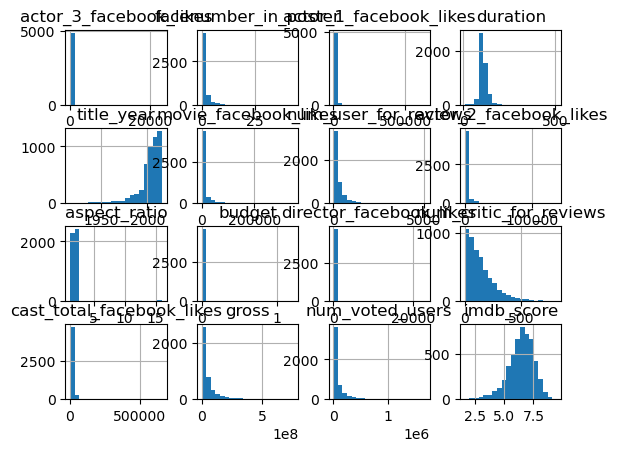

In [86]:
df_nums.hist(bins=20)

In [87]:
#The variables with skewness > 1 such as wheelbase, compressionratio, horsepower, price are highly positively skewed.
#The variables with skewness < -1 are highly negatively skewed.
#The variables with 0.5 < skewness < 1 such as carwidth, curbweight, citympg are moderately positively skewed.
# The variables with -0.5 < skewness < -1 such as stroke are moderately negatively skewed.
# And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed such as symboling, carheight, boreration, peakrpm, highwaympg.
df_nums.skew().sort_values()

title_year                   -2.292273
imdb_score                   -0.741471
num_critic_for_reviews        1.516533
duration                      2.339134
gross                         3.127204
num_voted_users               4.029871
num_user_for_reviews          4.121475
facenumber_in_poster          4.384766
movie_facebook_likes          5.058927
director_facebook_likes       5.229701
actor_3_facebook_likes        7.279021
aspect_ratio                  9.390056
actor_2_facebook_likes        9.884733
cast_total_facebook_likes    12.831928
actor_1_facebook_likes       19.121776
budget                       48.157435
dtype: float64

#### Preprocess Data

In [88]:
df_nums.isna().sum()

actor_3_facebook_likes        23
facenumber_in_poster          13
actor_1_facebook_likes         7
duration                      15
title_year                   108
movie_facebook_likes           0
num_user_for_reviews          21
actor_2_facebook_likes        13
aspect_ratio                 329
budget                       492
director_facebook_likes      104
num_critic_for_reviews        50
cast_total_facebook_likes      0
gross                        884
num_voted_users                0
imdb_score                     0
dtype: int64

In [89]:
df_nums.shape

(5043, 16)

In [90]:
df_nums['imdb_score'].quantile(q=[0.4,0.5,0.6])

0.4    6.3
0.5    6.6
0.6    6.8
Name: imdb_score, dtype: float64

In [91]:
df_nums['imdb_cut']=df_nums['imdb_score'].apply(lambda x:0 if x<=6.3 else(1 if x>=6.8 else 'middle'))

In [92]:
df_nums['imdb_cut'].value_counts()

imdb_cut
1         2133
0         2115
middle     795
Name: count, dtype: int64

In [93]:
795/len(df)

0.15764425936942297

In [94]:
df_nums_1=df_nums.drop(df_nums[df_nums['imdb_cut']=='middle'].index)
df_nums_1['imdb_cut'].value_counts()

imdb_cut
1    2133
0    2115
Name: count, dtype: int64

In [95]:
df_nums_1.head()

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users,imdb_score,imdb_cut
0,855.0,0.0,1000.0,178.0,2009.0,33000,3054.0,936.0,1.78,237000000.0,0.0,723.0,4834,760505847.0,886204,7.9,1
1,1000.0,0.0,40000.0,169.0,2007.0,0,1238.0,5000.0,2.35,300000000.0,563.0,302.0,48350,309404152.0,471220,7.1,1
2,161.0,1.0,11000.0,148.0,2015.0,85000,994.0,393.0,2.35,245000000.0,0.0,602.0,11700,200074175.0,275868,6.8,1
3,23000.0,0.0,27000.0,164.0,2012.0,164000,2701.0,23000.0,2.35,250000000.0,22000.0,813.0,106759,448130642.0,1144337,8.5,1
4,NaN,0.0,131.0,NaN,NaN,0,NaN,12.0,NaN,NaN,131.0,NaN,143,NaN,8,7.1,1


In [96]:
df_nums_1.columns

Index(['actor_3_facebook_likes', 'facenumber_in_poster',
       'actor_1_facebook_likes', 'duration', 'title_year',
       'movie_facebook_likes', 'num_user_for_reviews',
       'actor_2_facebook_likes', 'aspect_ratio', 'budget',
       'director_facebook_likes', 'num_critic_for_reviews',
       'cast_total_facebook_likes', 'gross', 'num_voted_users', 'imdb_score',
       'imdb_cut'],
      dtype='object')

In [97]:
#1d array (m,1).ravel() or (m,)
#pd.Series index
#pd.DataFrame with single column index and column label
x=df_nums_1.drop(['imdb_score','imdb_cut'],axis=1)
y=df_nums_1['imdb_cut'].to_numpy()

In [98]:
df_nums_1['imdb_cut'].to_numpy().shape

(4248,)

In [99]:
y.shape

(4248,)

In [100]:
y_labels=['imdb_low','imdb_high']

In [101]:
df_nums_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4248 entries, 0 to 5041
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   actor_3_facebook_likes     4228 non-null   float64
 1   facenumber_in_poster       4235 non-null   float64
 2   actor_1_facebook_likes     4242 non-null   float64
 3   duration                   4235 non-null   float64
 4   title_year                 4148 non-null   float64
 5   movie_facebook_likes       4248 non-null   int64  
 6   num_user_for_reviews       4228 non-null   float64
 7   actor_2_facebook_likes     4236 non-null   float64
 8   aspect_ratio               3960 non-null   float64
 9   budget                     3817 non-null   float64
 10  director_facebook_likes    4152 non-null   float64
 11  num_critic_for_reviews     4200 non-null   float64
 12  cast_total_facebook_likes  4248 non-null   int64  
 13  gross                      3454 non-null   float64
 1

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,stratify=y,random_state=100)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [103]:
x_train.sort_index().head()

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users
0,855.0,0.0,1000.0,178.0,2009.0,33000,3054.0,936.0,1.78,237000000.0,0.0,723.0,4834,760505847.0,886204
2,161.0,1.0,11000.0,148.0,2015.0,85000,994.0,393.0,2.35,245000000.0,0.0,602.0,11700,200074175.0,275868
3,23000.0,0.0,27000.0,164.0,2012.0,164000,2701.0,23000.0,2.35,250000000.0,22000.0,813.0,106759,448130642.0,1144337
4,NaN,0.0,131.0,NaN,NaN,0,NaN,12.0,NaN,NaN,131.0,NaN,143,NaN,8
7,284.0,1.0,799.0,100.0,2010.0,29000,387.0,553.0,1.85,260000000.0,15.0,324.0,2036,200807262.0,294810


In [104]:
x_train.shape

(2973, 15)

In [105]:
x_train.describe()

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users
count,2959.000000,2963.000000,2969.000000,2964.000000,2903.000000,2973.000000,2959.000000,2965.000000,2762.000000,2.653000e+03,2907.000000,2940.000000,2973.000000,2.423000e+03,2.973000e+03
mean,650.682663,1.331421,6494.261704,106.969973,2002.216672,7446.565758,278.655965,1603.025632,2.226738,4.090344e+07,680.023048,139.463605,9596.612176,4.814273e+07,8.544587e+04
std,1750.564118,1.966854,17487.530710,26.048323,12.722760,20061.581475,392.936679,4245.150715,1.425877,2.543049e+08,2804.035254,123.376048,20525.599505,7.048790e+07,1.474329e+05
min,0.000000,0.000000,0.000000,7.000000,1916.000000,0.000000,1.000000,0.000000,1.200000,2.180000e+02,0.000000,1.000000,0.000000,1.620000e+02,5.000000e+00
25%,132.000000,0.000000,606.000000,93.000000,1999.000000,0.000000,64.000000,282.000000,1.850000,5.500000e+06,6.000000,49.000000,1379.000000,5.705630e+06,8.217000e+03
50%,368.000000,1.000000,975.000000,103.000000,2005.000000,158.000000,159.000000,592.000000,2.350000,1.800000e+07,44.000000,108.000000,3016.000000,2.439747e+07,3.239900e+04
75%,627.500000,2.000000,11000.000000,117.000000,2011.000000,2000.000000,329.000000,898.000000,2.350000,4.000000e+07,192.000000,192.000000,13071.000000,5.971586e+07,9.246100e+04
max,23000.000000,31.000000,640000.000000,511.000000,2016.000000,349000.000000,5060.000000,137000.000000,16.000000,1.221550e+10,22000.000000,813.000000,656730.000000,7.605058e+08,1.689764e+06


##### Change distribution to be normalized

In [106]:
powertran=preprocessing.PowerTransformer()
powertran=powertran.fit(x_train)
x_train=pd.DataFrame(powertran.transform(x_train),columns=x_train.columns)
x_train.head()

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users
0,0.076214,-1.048678,-0.481017,0.373111,0.453136,0.607972,-0.993857,-0.306605,-0.639743,-0.064374,0.645701,-0.548083,-0.327672,-1.671120,-0.509705
1,0.743956,0.899262,-0.290918,-0.731938,0.234625,1.183027,-0.404985,0.288557,-0.896681,-1.475926,-0.184101,0.121030,0.126709,-1.775062,0.221228
2,0.730093,-1.048678,-0.296795,-0.688175,-0.456064,1.256336,1.210289,0.367064,-0.639743,-0.316328,0.991276,0.344038,-0.068187,-0.357613,1.197378
3,-0.039819,-1.048678,1.325590,0.020964,1.045084,1.370346,0.474722,0.154100,-0.639743,0.405867,-1.520837,1.859988,1.088979,0.250806,0.979463
4,-0.263727,1.434581,-0.307640,0.257330,0.800181,1.215854,0.004082,0.281349,-0.639743,0.517688,0.093067,0.215766,-0.295339,0.375621,0.245750


In [107]:
powertran.lambdas_

array([ 1.55867455e-01, -6.33919025e-01,  4.91365438e-02,  4.89664131e-01,
        4.68507943e+01, -4.20929269e-02,  1.49480248e-01,  8.59455455e-02,
       -2.14586317e+00,  1.59219753e-01, -2.36082527e-02,  3.06795168e-01,
        1.35500025e-01,  2.26026592e-01,  1.54335941e-01])

array([[<Axes: title={'center': 'actor_3_facebook_likes'}>,
        <Axes: title={'center': 'facenumber_in_poster'}>,
        <Axes: title={'center': 'actor_1_facebook_likes'}>,
        <Axes: title={'center': 'duration'}>],
       [<Axes: title={'center': 'title_year'}>,
        <Axes: title={'center': 'movie_facebook_likes'}>,
        <Axes: title={'center': 'num_user_for_reviews'}>,
        <Axes: title={'center': 'actor_2_facebook_likes'}>],
       [<Axes: title={'center': 'aspect_ratio'}>,
        <Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'director_facebook_likes'}>,
        <Axes: title={'center': 'num_critic_for_reviews'}>],
       [<Axes: title={'center': 'cast_total_facebook_likes'}>,
        <Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'num_voted_users'}>, <Axes: >]],
      dtype=object)

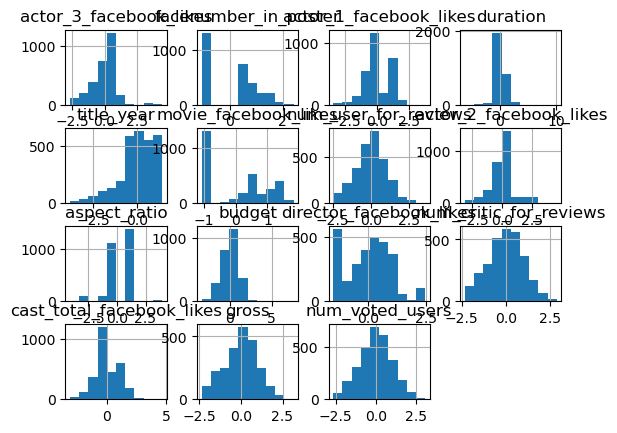

In [108]:
x_train.hist()


In [109]:
x_test=pd.DataFrame(powertran.transform(x_test),columns=x_test.columns)

##### fill missing values

In [110]:
imputer=impute.SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit(x_train)
x_train=pd.DataFrame(imputer.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(imputer.transform(x_test),columns=x_train.columns)

##### scale features: not necessary as you did powertransformer already

In [111]:
scaler=preprocessing.StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_train.columns)

##### select feature

In [112]:
n=len(x_train.columns)
n

15

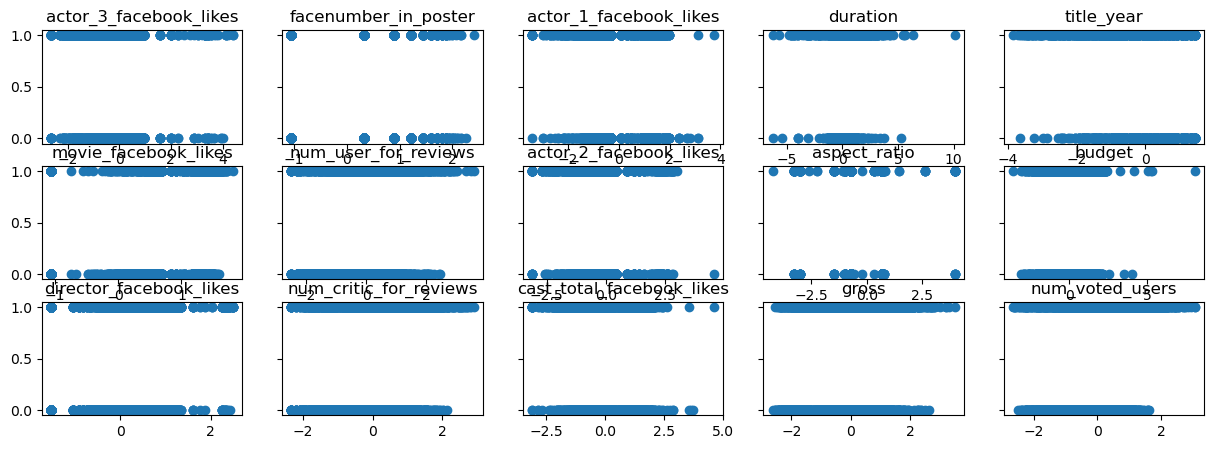

In [ ]:
fig,ax=plt.subplots(3,5,figsize=(15,5),sharey=True)
for i in np.arange(0,n):
    col=x_train.columns[i]
    ax[divmod(i,5)[0],divmod(i,5)[1]].scatter(x_train[col],y_train)
    ax[divmod(i,5)[0],divmod(i,5)[1]].set_title(col)
plt.show()

In [57]:
x_train.corr().mask(x_train.corr().abs()<0.8,'')

,actor_3_facebook_likes,facenumber_in_poster,actor_1_facebook_likes,duration,title_year,movie_facebook_likes,num_user_for_reviews,actor_2_facebook_likes,aspect_ratio,budget,director_facebook_likes,num_critic_for_reviews,cast_total_facebook_likes,gross,num_voted_users
actor_3_facebook_likes,1.0,,,,,,,0.830951,,,,,,,
facenumber_in_poster,,1.0,,,,,,,,,,,,,
actor_1_facebook_likes,,,1.0,,,,,,,,,,0.96761,,
duration,,,,1.0,,,,,,,,,,,
title_year,,,,,1.0,,,,,,,,,,
movie_facebook_likes,,,,,,1.0,,,,,,,,,
num_user_for_reviews,,,,,,,1.0,,,,,,,,0.896937
actor_2_facebook_likes,0.830951,,,,,,,1.0,,,,,0.832134,,
aspect_ratio,,,,,,,,,1.0,,,,,,
budget,,,,,,,,,,1.0,,,,,


<Axes: >

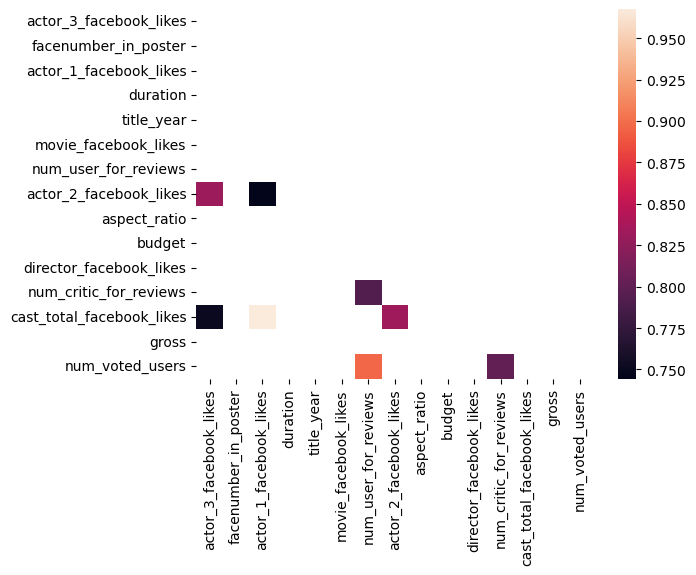

In [58]:
sns.heatmap(x_train.corr(),annot=True,fmt='.1f',mask = np.triu(np.ones_like(x_train.corr(), dtype=bool))|(abs(x_train.corr())<0.7))

In [59]:
# VIF starts at 1 and has no upper limit
# VIF = 1, no correlation between the independent variable and the other variables
# VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['vif']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif.sort_values(by=['vif'])

,features,vif
1,facenumber_in_poster,1.067956
10,director_facebook_likes,1.082957
5,movie_facebook_likes,1.088280
8,aspect_ratio,1.180205
3,duration,1.228234
9,budget,1.625332
13,gross,1.634747
4,title_year,1.670189
0,actor_3_facebook_likes,4.008806
11,num_critic_for_reviews,4.184276


In [60]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LogisticRegression(random_state=100)).fit(x_train, y_train)
selector.get_support(indices=True)

array([ 2,  3,  6,  9, 12, 14])

In [61]:
for i in selector.get_support(indices=True).tolist():
    print(x_train.columns[i])

actor_1_facebook_likes
duration
num_user_for_reviews
budget
cast_total_facebook_likes
num_voted_users


In [62]:
selected_features_1=x_train.columns[selector.get_support(indices=True)].tolist()
selected_features_1

['actor_1_facebook_likes',
 'duration',
 'num_user_for_reviews',
 'budget',
 'cast_total_facebook_likes',
 'num_voted_users']

In [63]:
selected_features=list(set(x_train.columns)-set(['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','num_critic_for_reviews','num_user_for_reviews']))

In [64]:
x_train[selected_features].corr().mask(x_train[selected_features].corr().abs()<0.7,'')

,aspect_ratio,facenumber_in_poster,budget,director_facebook_likes,cast_total_facebook_likes,duration,title_year,movie_facebook_likes,gross,num_voted_users
aspect_ratio,1.0,,,,,,,,,
facenumber_in_poster,,1.0,,,,,,,,
budget,,,1.0,,,,,,,
director_facebook_likes,,,,1.0,,,,,,
cast_total_facebook_likes,,,,,1.0,,,,,
duration,,,,,,1.0,,,,
title_year,,,,,,,1.0,,,
movie_facebook_likes,,,,,,,,1.0,,
gross,,,,,,,,,1.0,
num_voted_users,,,,,,,,,,1.0


In [65]:
vif_after=pd.DataFrame()
vif_after['features']=x_train[selected_features].columns
vif_after['vif']=[variance_inflation_factor(x_train[selected_features].values,i) for i in range(x_train[selected_features].shape[1])]
vif_after.sort_values(by=['vif'])

,features,vif
1,facenumber_in_poster,1.034982
7,movie_facebook_likes,1.071237
3,director_facebook_likes,1.079528
0,aspect_ratio,1.171700
5,duration,1.209956
6,title_year,1.271373
4,cast_total_facebook_likes,1.427196
8,gross,1.576121
2,budget,1.615244
9,num_voted_users,1.971153


#### Model

##### train

In [66]:
# lr=LogisticRegression(random_state=100)
# lr.fit(x_train[selected_features],y_train)

In [67]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train[selected_features],y_train)

KNeighborsClassifier()

In [ ]:
y_train_pred= knn.predict(x_train[selected_features])

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.81      0.89      0.85      1480
   imdb_high       0.88      0.79      0.83      1493

    accuracy                           0.84      2973
   macro avg       0.84      0.84      0.84      2973
weighted avg       0.84      0.84      0.84      2973

Accuracy on train:   0.8382105617221661 



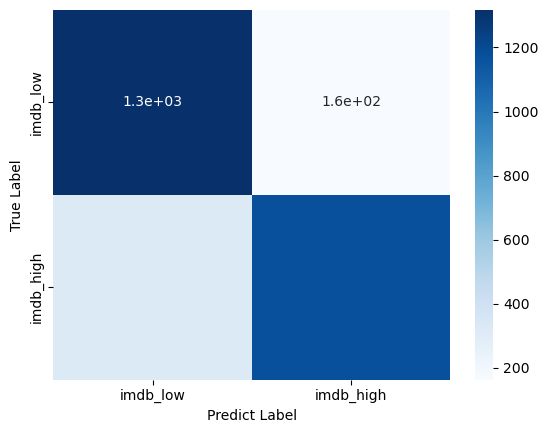

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_train, y_train_pred,target_names=y_labels))
print("Accuracy on train:  ",knn.score(x_train[selected_features],y_train),'\n')
cf=metrics.confusion_matrix(y_train,y_train_pred)
sns.heatmap(cf,annot=True,cmap='Blues',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()


##### test

In [ ]:
y_test_pred=pd.DataFrame(knn.predict(x_test[selected_features]))

#### Validation

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.74      0.82      0.78       635
   imdb_high       0.80      0.72      0.76       640

    accuracy                           0.77      1275
   macro avg       0.77      0.77      0.77      1275
weighted avg       0.77      0.77      0.77      1275

Accuracy on train:   0.7686274509803922 



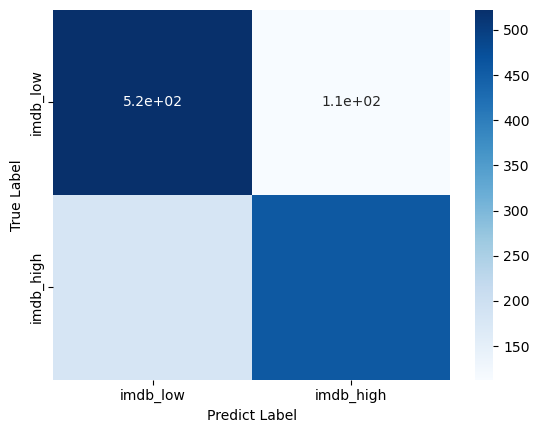

In [ ]:
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred,target_names=y_labels))
print("Accuracy on train:  ",knn.score(x_test[selected_features],y_test),'\n')
cf=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf,annot=True,cmap='Blues',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

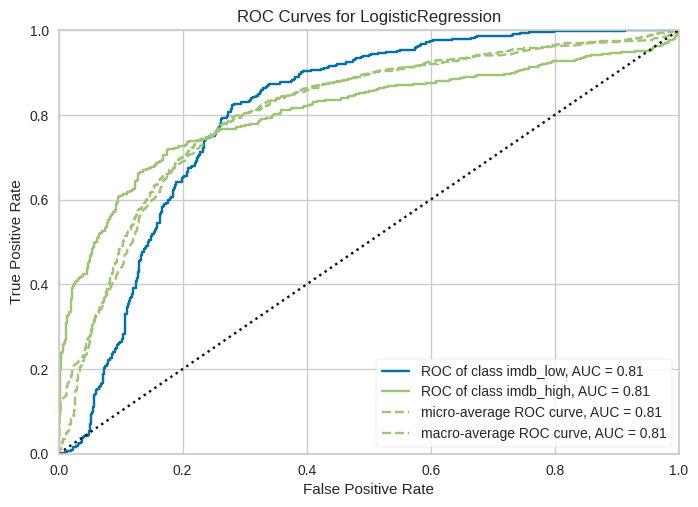

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(LogisticRegression(random_state=100), classes=y_labels)
visualizer.fit(x_train[selected_features], y_train)        # Fit the training data to the visualizer
visualizer.score(x_test[selected_features], y_test)        # Evaluate the model on the test data
visualizer.show()

#### All features Model

Classification Report: 
               precision    recall  f1-score   support

    imdb_low       0.75      0.76      0.76       635
   imdb_high       0.76      0.75      0.75       640

    accuracy                           0.75      1275
   macro avg       0.75      0.75      0.75      1275
weighted avg       0.75      0.75      0.75      1275



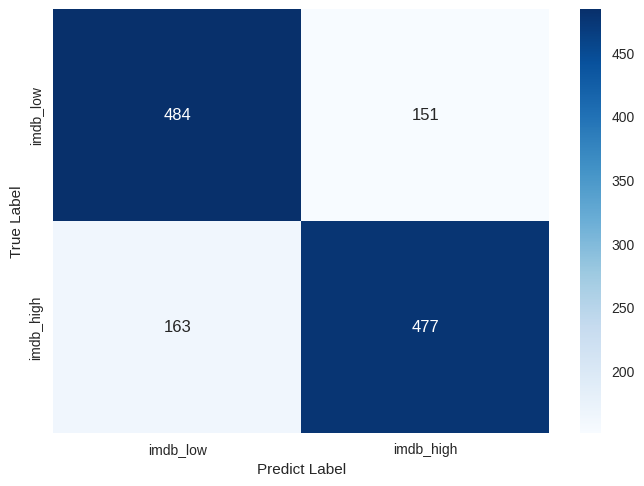

In [ ]:
lr_all=LogisticRegression()
lr_all.fit(x_train,y_train)
y_test_pred_all=pd.DataFrame(lr_all.predict(x_test))
print("Classification Report: \n", metrics.classification_report(y_test, y_test_pred,target_names=y_labels))
cf=metrics.confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf,annot=True,cmap='Blues',fmt='.0f',yticklabels=y_labels,xticklabels=y_labels)
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

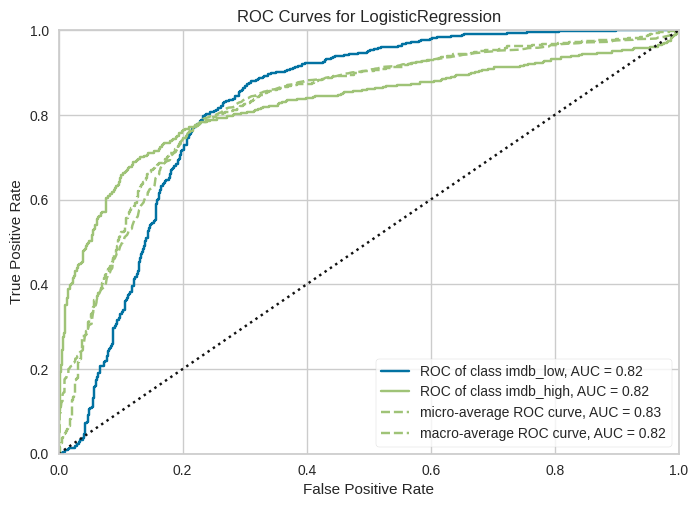

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(LogisticRegression(), classes=y_labels)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()

In [ ]:
result_all=pd.DataFrame()
result_all['features']=lr_all.feature_names_in_
result_all['coef']=lr_all.coef_[0]
result_all['exp_coef']=np.exp(lr_all.coef_[0])
result_all.loc[len(result_all)]=["intercept",lr_all.intercept_[0],np.exp(lr_all.intercept_[0])]
result_all.sort_values(by=['exp_coef'])

,features,coef,exp_coef
10,budget,-0.639542,0.527534
6,cast_total_facebook_likes,-0.594780,0.551684
11,num_user_for_reviews,-0.533066,0.586803
4,title_year,-0.332823,0.716897
5,actor_3_facebook_likes,-0.280827,0.755159
14,gross,-0.247531,0.780726
0,facenumber_in_poster,-0.103388,0.901777
1,actor_2_facebook_likes,0.007886,1.007917
3,aspect_ratio,0.025371,1.025695
13,director_facebook_likes,0.027312,1.027688
